In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [13]:
palette = ['#003f5c', '#7a5195', '#ef5675', '#ffa600'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Offered load by STA [Mbps]"

In [3]:
data = pd.read_csv('load.csv').drop_duplicates()
data

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,...,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,dataRate,scenario,switchAuxPhy
0,407456,1,1,0,1,0.006800,0.000038,0.000189,10.0003,157277040,...,102937,1.01091,1.01091,121.000,121.000,3.925010,19.4643,10,A,0
1,407456,1,1,0,2,0.000000,0.000040,0.000229,10.0003,157287736,...,102937,1.00220,1.00220,121.000,121.000,4.106960,23.5989,10,D,0
2,407456,1,1,0,2,0.000971,0.000008,0.000313,10.0003,157286208,...,102937,1.00283,1.00283,120.999,120.999,0.803659,32.1837,10,C,0
3,407456,1,1,0,1,0.008258,0.000024,0.000193,20.0003,314547968,...,205873,1.01091,1.01091,120.999,120.999,4.850990,39.7292,20,A,0
4,407456,1,1,0,3,0.000971,0.000006,0.000313,10.0003,157286208,...,102937,1.00284,1.00284,120.999,120.999,0.596390,32.1916,10,E,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,407458,1,1,0,1,29.974500,0.000063,0.903707,105.0430,1652110272,...,1544044,1.00575,1.00575,121.000,121.000,68.531700,977110.0000,150,A,0
176,407458,1,1,0,3,25.598600,0.000055,0.926768,104.1680,1638333824,...,1441113,1.00596,1.00596,121.000,121.000,58.466400,993688.0000,140,E,0
177,407458,1,1,0,2,30.629700,0.000065,0.908643,104.0630,1636653024,...,1544044,1.00802,1.00802,121.000,121.000,69.977500,973254.0000,150,C,0
178,407458,1,1,0,2,30.652100,0.000065,0.908533,104.0290,1636124336,...,1544044,1.00807,1.00807,121.000,121.000,70.023200,972823.0000,150,D,0


C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\3184690722.py:14: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  ax.legend(


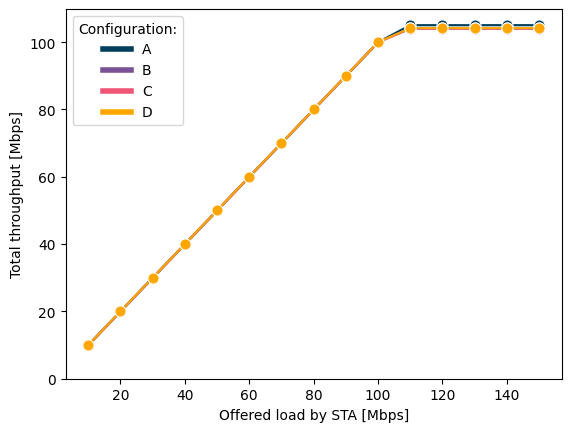

In [14]:
plot_sum = data.groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'throughput', 'loss', 'jitter', 'latency']).sum().reset_index()
plot_sum
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='dataRate', y='throughput', hue='scenario', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_linewidth(4) 
ax.legend(
      handles=handles[1:8],
      labels=['A', 'B', 'C', 'D'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='medium',   # Rozmiar czcionki
      title='Configuration:',         # <- Tytuł legendy
      title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )
ax.set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
ax.set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
plt.savefig('dataRate_thr.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\4042652748.py:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='dataRate', y='loss', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')


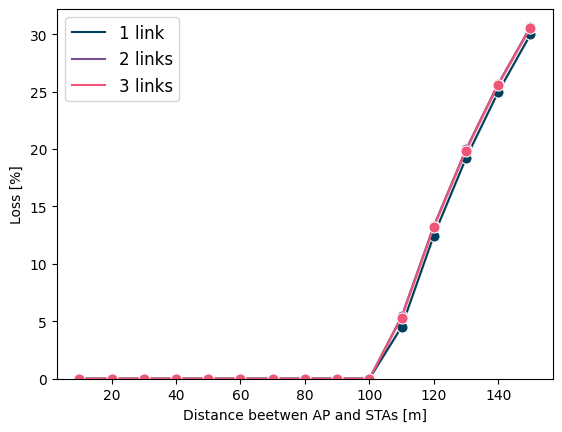

In [5]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='dataRate', y='loss', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
ax.set(xlabel=xlabel, ylabel='Loss [%]')
plt.savefig('dataRate_loss.svg', bbox_inches='tight')

In [6]:
plot_sum = plot_sum[plot_sum['latency'] != 0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\1665373043.py:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='dataRate', y='jitter', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')


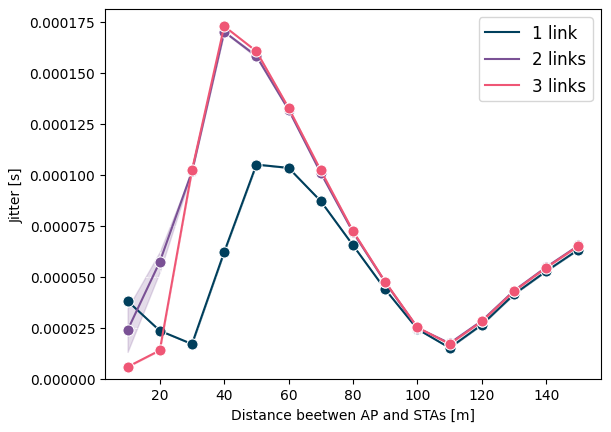

In [7]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='dataRate', y='jitter', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel=xlabel, ylabel='Jitter [s]')
ax.set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
plt.savefig('dataRate_jitt.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\264487034.py:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='dataRate', y='latency', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')


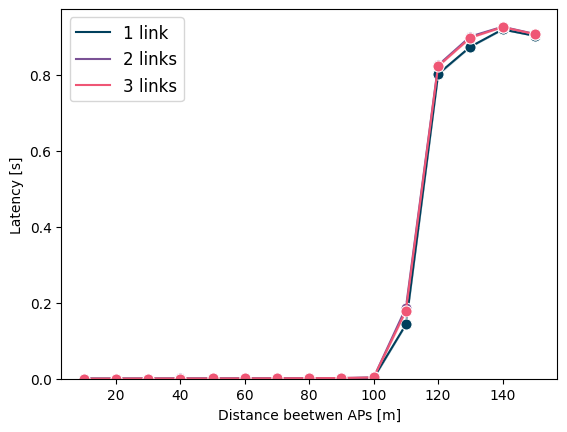

In [8]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='dataRate', y='latency', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set_ylim(0) 
ax.set(xlabel='Distance beetwen APs [m]', ylabel='Latency [s]')
plt.savefig('dataRate_lat.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\1433276297.py:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='dataRate', y='throughput', hue='linksNumber',
C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\1433276297.py:19: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='dataRate', y='loss', hue='linksNumber',


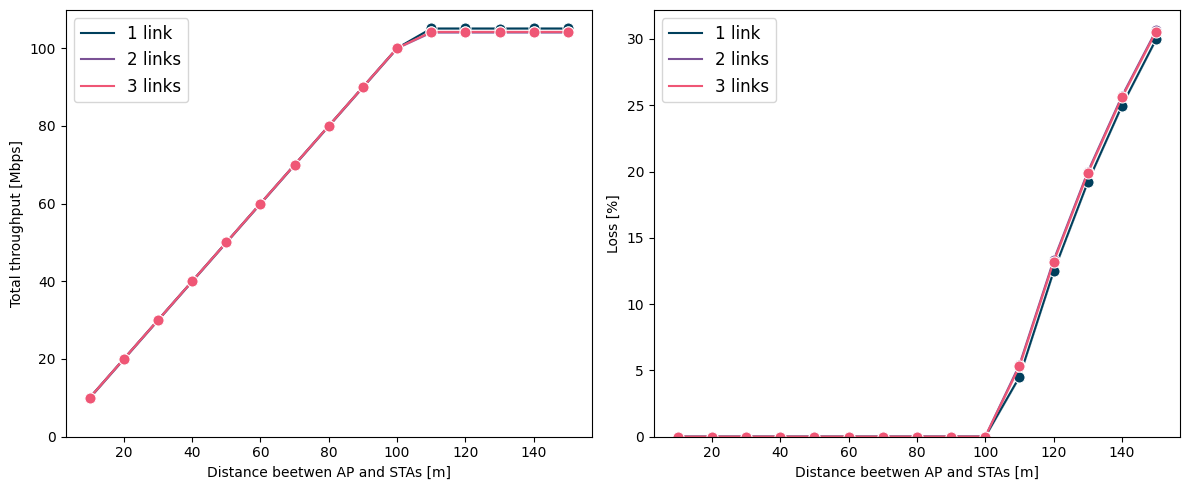

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)  # Dwa wykresy w jednym rzędzie

# Pierwszy wykres - Throughput
sns.lineplot(data=plot_sum, x='dataRate', y='throughput', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[0], style='nStations')

axes[0].tick_params(axis='y', which='both', labelleft=True)
for line in axes[0].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[0].set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
axes[0].grid(color='white', linestyle='--', linewidth=0.5)

# Drugi wykres - Loss
sns.lineplot(data=plot_sum, x='dataRate', y='loss', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[1], style='nStations')

axes[1].tick_params(axis='y', which='both', labelleft=True)
for line in axes[1].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[1].set(xlabel=xlabel, ylabel='Loss [%]')
axes[1].grid(color='white', linestyle='--', linewidth=0.5)
axes[0].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
axes[1].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Loss
plt.tight_layout()  # Optymalne rozmieszczenie wykresów
plt.savefig('dataRate_thr_loss.svg', bbox_inches='tight')
plt.show()
